In [148]:
library(tidyverse)
install.packages('caret')
install.packages("glmnet", repos = "https://cran.us.r-project.org")
library(caret)
require(gh)
library(stringr)
tmp = tempfile()
qurl = 'https://raw.githubusercontent.com/Nakul24-1/ML-Cars/main/mushrooms.csv'
gh(paste0('GET ', qurl), .destfile = tmp, .overwrite = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "/tmp/RtmpGfY40m/file41741a35ab"
attr(,"class")
[1] "gh_response" "path"       

In [149]:
library(rpart)

In [171]:
mush = read.csv(tmp,stringsAsFactors = T)
head(mush)
mush$veil.type

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,p,x,s,n,t,p,f,c,n,k,⋯,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,⋯,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,⋯,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,⋯,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,⋯,s,w,w,p,w,o,e,n,a,g
6,e,x,y,y,t,a,f,c,b,n,⋯,s,w,w,p,w,o,p,k,n,g


[1] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
  [38] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
  [75] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [112] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [149] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [186] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [223] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [260] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [297] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [334] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [371] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [408] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [445] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [482] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [519] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [556] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [593] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [630] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [667] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [704] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [741] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [778] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [815] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [852] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [889] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [926] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
 [963] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1000] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1037] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1074] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1111] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1148] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1185] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1222] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1259] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1296] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1333] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1370] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1407] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1444] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1481] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1518] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1555] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1592] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1629] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1666] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1703] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1740] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1777] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1814] p p p p p p p p p p p p p p

In [172]:
set.seed(121)

mush = mush %>% select(-veil.type)
mush_x = mush %>% select(-class)
mush_y = mush %>% select(class)

size<- floor(0.7*nrow(mush))
train_ind <- sample(seq_len(nrow(mush)), size = size)
train<-mush[train_ind,]
test<-mush[-train_ind,]
train_y <- as.data.frame(mush_y[train_ind,])
test_y<-as.data.frame(mush_y[-train_ind,])
names(train_y) = 'class'
names(test_y) = 'class'
true_test_y = 1*(test$class == 'p')
true_test_y

[1] 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
  [38] 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  [75] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [112] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [371] 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 [408] 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 [445] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [482] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 [519] 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 [593] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [667] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 [926] 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 [963] 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
[1000] 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1
[1037] 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0
[1074] 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0
[1111] 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1
[1148] 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0
[1185] 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0
[1222] 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
[1259] 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
[1296] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1370] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
[1407] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
[1444] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
[1481] 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[1518] 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
[1555] 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1
[1592] 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0
[1629] 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[1666] 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
[1703] 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
[1740] 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0
[1777] 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
[1814] 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# Random Forest

In [173]:
install.packages('doParallel')
install.packages('randomForest')
library(doParallel)
library(future)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [174]:
library(randomForest)
	classifier_rf = randomForest(x = train[-1], y = train$class, 
	                             data = train,ntree = 100)
	y_pred_rf = predict(classifier_rf, newdata = test[-1])
	confusionMatrix(test$class, y_pred_rf)

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1283    0
         p    0 1155
                                     
               Accuracy : 1          
                 95% CI : (0.9985, 1)
    No Information Rate : 0.5263     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5263     
         Detection Rate : 0.5263     
   Detection Prevalence : 0.5263     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     

In [167]:
install.packages('PRROC')
library(PRROC)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

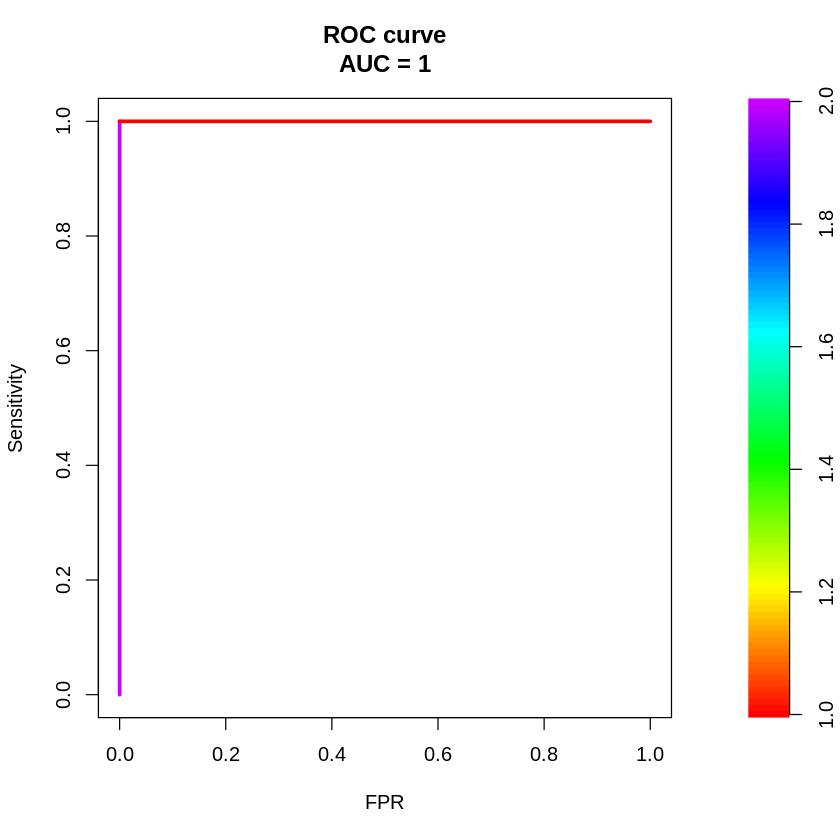

In [175]:
PRROC_obj <- roc.curve(scores.class0 = y_pred_rf, weights.class0 = true_test_y,
                       curve=TRUE)
plot(PRROC_obj) 

# AdaBoost

In [154]:
install.packages('fastAdaboost')
library(fastAdaboost)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [190]:
ad <- adaboost(class ~., data = train, tree_depth = 5, n_rounds = 5,10)


In [191]:
y_pred_ada = predict(ad, newdata = test[-1])
y_pred_ada$class

[1] e p e e e e e e e e e e e p e e e e e e e e e p e e e e p e e e e e e e e
  [38] e e p e e e e e e e e p e e e e e e e p e e e e e e e e e e e e e p e e e
  [75] p e e e e e e e e e e e e e e e e e p e e e e e e e e e e e e e e e p e e
 [112] e e e e e p e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [149] e e p e e e e e e e e e p e e e p e e e e e e e p e p e e e e p e e e e e
 [186] e e e e e e e e e e e e e e e e e p p p p e e e e e e e e p p e e e e e e
 [223] e e e e e e e e e e e p e p e e e e e e e e e e e p e e e e e e e e e e e
 [260] e e e e p e e e e e p e e p e e e p e e e e e e e e e e e e e e e e e e e
 [297] p e e e e e e e p e e e e p e e e e e p e e p e e e p e e e e e e e e e e
 [334] e e p e e e e e e e e e e e e e e e p e e e e e e e e e e e e e e e p e e
 [371] e e p e e p p p e e e p e e e e e e p e e e e e e e e e e p e e e e p e e
 [408] e e e e e e p p e e e e e e e e e e e e e e e e p e e e e e e e p p e p e
 [445] e e e e e e e e p e e e e e e e e e e e e e e e e e e e e e e p e e e e e
 [482] e e e e e p e e e e e e e e e e e e e e e e e e e e e e e p e e e e p e e
 [519] e e p e e e e e p e e e e e p e e p e e e e e e e e e e e e e e e e e e e
 [556] e e p e e e e e e e e e e e e e e e e e e e e p e e e e e e e e e e p e e
 [593] e e p p e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [630] e e e e p e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e
 [667] e e e e p e e e e e e e e e e e e e e e e p e e e e e e e e e e e e e e e
 [704] e e e e e p e e e e e e e e e p e e e e e e e e e e e p e e e e e e e e e
 [741] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [778] e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e e e e e e e
 [815] e e e e e e e e e e e e p e e p e e e e e e e e e p e e e e e e e e e e e
 [852] e e e e e e e e p e e e e e e e e e e e e e e e e e e p e e e e e e e e e
 [889] e e e e p e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e p p
 [926] e p e e e e e e e e e p e p e p p p p p e p e e e p e e e e e e e e p e e
 [963] e p p p e p e e e e p e e e e p e e e p e e e e e p e e p e p e e e e e e
[1000] p p p p e p e e p e e e e p e p e e e e e e e e e p e e p p e e p e p e p
[1037] p p e p p e e e e e p p p e e p e e p e p e p e e e e e p p p p e p p e e
[1074] p e p e e e p p e e e e e e e p e e p e p p e e p e e p e p e e p e e e e
[1111] p e e e p e p p p p e p e p p e e e p e p e e e p e e e e p e e e p e p p
[1148] e p p e p p p e e e p e e e p p e e e e e e p e e e p p p e e p e p e p e
[1185] e e p e e p e p p p p e e p p p p p p e p p e p e p p p p e e p e p p p e
[1222] e p p e p e e p p e e p p p p p p p p p p p p p e p p p p p p e p p p e p
[1259] p p p p p e p p p e p e p p e e p p e p e p p p p e p p p e e p p e p p p
[1296] p p p p p p p p p p p p p p p p e p p p p p p p p p p p p p p p p p p p p
[1333] p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1370] p p p p p p p p p p p p p p p p p p p p p p p p p p p p e p p p p p p p p
[1407] e p p p p p p p p p p p p p p p e p p e p p p p p p p p p p p p p p p e p
[1444] p p p p p p p p e p p p p p p p p p e p p p e p p p p p e p p p p p p p p
[1481] p p p p p e p e p p p p p p p p p p e p p p p p p p p p p p p p p e p p p
[1518] e p p p p p p p p p e p p p p p e p p p p p p p p p p p p e p p p e p p e
[1555] e p e p p e p p p p p e p p p p p p e p p p p e p p p p e p e e p p e e p
[1592] p e e p p p p e e p p e e e p p p p p p p e p e p p p p e p p p e p p p e
[1629] p p p e p p p e p e e e e e p p p p e e p p p p p p p p p p p p p e p p p
[1666] e p e p p e p p e p e e p p p p p p e p p p e p p p e p p e p p p e p p p
[1703] p p p e p e e e e p p p p p p p e p p p p p e p e p p p e p p p e p e p p
[1740] p e p p p p p e p e p p e e p e p p p e p p p p e p p p e e p e p p p p e
[1777] p p p e p p p e p p p p p e p e p p p p p e p p e p p p e p p p p p p p p
[1814] p p p p p p p p p p p p p p

In [192]:
	confusionMatrix(y_pred_ada$class,test$class)

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1283    3
         p    0 1152
                                          
               Accuracy : 0.9988          
                 95% CI : (0.9964, 0.9997)
    No Information Rate : 0.5263          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9975          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9974          
         Pos Pred Value : 0.9977          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5263          
         Detection Rate : 0.5263          
   Detection Prevalence : 0.5275          
      Balanced Accuracy : 0.9987          
                                          
       'Positive' Class : e               
                        

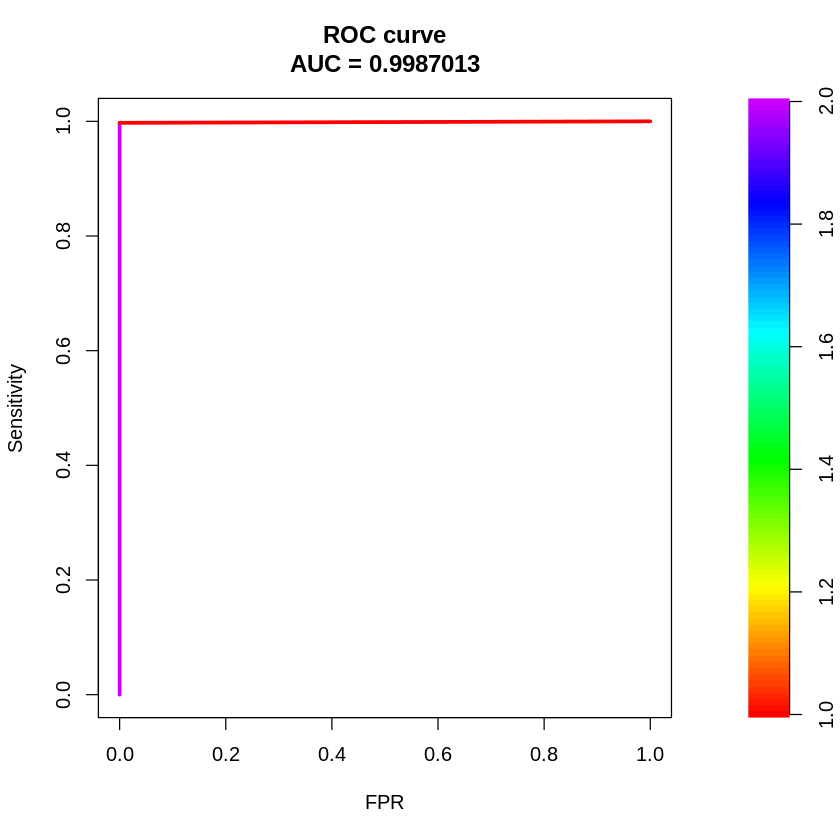

In [193]:

PRROC_obj <- roc.curve(scores.class0 = as.factor(y_pred_ada$class) , weights.class0 = true_test_y,
                       curve=TRUE)
plot(PRROC_obj) 

# Bagging

In [194]:
bag <- bagging(class ~., data = train,30)

In [195]:
y_pred_bag = predict(bag, newdata = test[-1])
y_pred_bag$class

[1] "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e"
  [19] "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e"
  [37] "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e"
  [55] "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e"
  [73] "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
  [91] "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [109] "p" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [127] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [145] "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e"
 [163] "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "p" "e" "p" "e" "e" "e" "e" "p"
 [181] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [199] "e" "e" "e" "e" "p" "p" "p" "p" "e" "e" "e" "e" "e" "e" "e" "e" "p" "p"
 [217] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p"
 [235] "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e"
 [253] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "p"
 [271] "e" "e" "p" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [289] "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "p" "e"
 [307] "e" "e" "e" "p" "e" "e" "e" "e" "e" "p" "e" "e" "p" "e" "e" "e" "p" "e"
 [325] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e"
 [343] "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e"
 [361] "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "p" "e" "e" "p" "p" "p"
 [379] "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e"
 [397] "e" "e" "e" "p" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "p"
 [415] "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p"
 [433] "e" "e" "e" "e" "e" "e" "e" "p" "p" "e" "p" "e" "e" "e" "e" "e" "e" "e"
 [451] "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [469] "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [487] "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [505] "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "p" "e" "e" "e" "e" "p" "e"
 [523] "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "p" "e" "e" "p" "e" "e" "e" "e"
 [541] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p"
 [559] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [577] "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e"
 [595] "p" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [613] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [631] "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [649] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e"
 [667] "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [685] "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [703] "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e"
 [721] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e"
 [739] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [757] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [775] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e"
 [793] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e"
 [811] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e"
 [829] "e" "p" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e"
 [847] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e"
 [865] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e"
 [883] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "p" "e" "e" "e" "e" "e" "e" "e"
 [901] "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e" "e

In [196]:
confusionMatrix(as.factor(y_pred_bag$class),test$class)

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1283   16
         p    0 1139
                                          
               Accuracy : 0.9934          
                 95% CI : (0.9894, 0.9962)
    No Information Rate : 0.5263          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9868          
                                          
 Mcnemar's Test P-Value : 0.0001768       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9861          
         Pos Pred Value : 0.9877          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5263          
         Detection Rate : 0.5263          
   Detection Prevalence : 0.5328          
      Balanced Accuracy : 0.9931          
                                          
       'Positive' Class : e               
                        

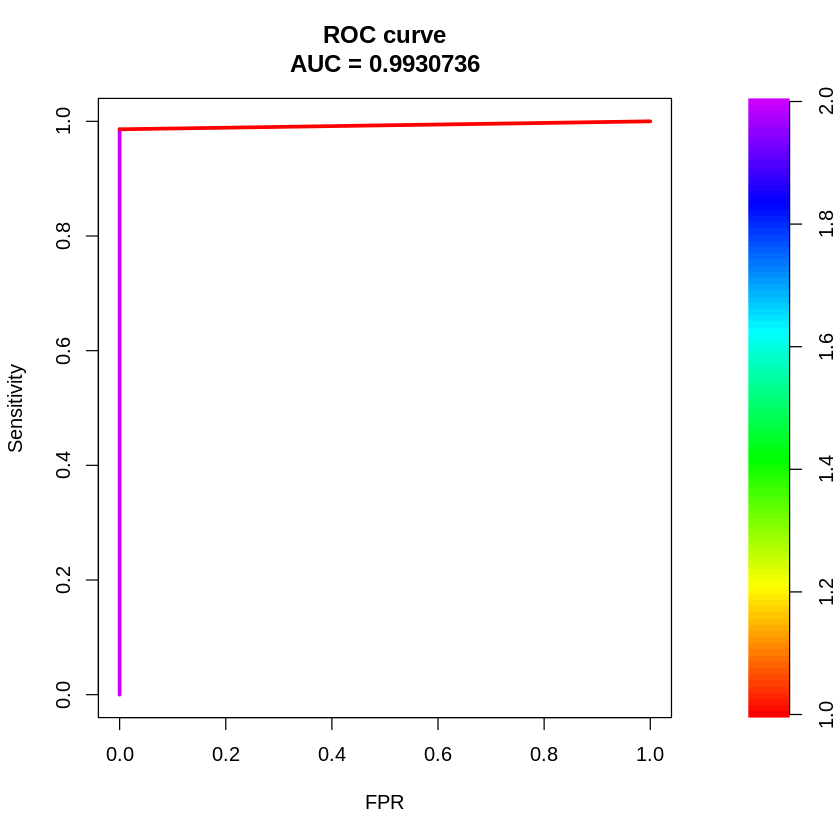

In [197]:
PRROC_obj <- roc.curve(scores.class0 = as.factor(y_pred_bag$class) , weights.class0 = true_test_y,
                       curve=TRUE)
plot(PRROC_obj)

# Running in Parallel and comparision

In [198]:
cl <- makeCluster(3)


setDefaultCluster(cl)
registerDoParallel(cl)

In [199]:
system.time({
classifier_rf = randomForest(x = train[-1], y = train$class, 
	                             data = train,ntree = 250)
bag <- bagging(class ~., data = train,35)
ad <- adaboost(class ~., data = train, tree_depth = 10, n_rounds = 5,10)
})



   user  system elapsed 
  5.269   0.178   5.460 

In [188]:
stopCluster(cl) # close multi-core cluster
rm(cl)


In [200]:
system.time({
classifier_rf = randomForest(x = train[-1], y = train$class, 
	                             data = train,ntree = 250)
bag <- bagging(class ~., data = train,35)
ad <- adaboost(class ~., data = train, tree_depth = 10, n_rounds = 5,10)
  })

   user  system elapsed 
  5.526   0.056   5.594 